# Imports

In [1]:
import sys
import imp
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr,pearsonr,ttest_1samp, ttest_ind
import pickle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sys.path.append('../data_processing_code/')
sys.path.append('.')

import get_data
imp.reload(get_data)
from get_data import get_data, get_data_online
from get_data import scale as scale_fun

import plotting
imp.reload(plotting)
from plotting import *

In [3]:
def convert_diagnosis_to_color(diag):
    color=[]
    for d in diag:
        if d=='control_mfmri':
            color.append(sns.color_palette()[0])
        elif d=='control_cdm':
            color.append(sns.color_palette()[1])
        elif d=='MDD':
            color.append(sns.color_palette()[2])
        elif d=='GAD':
            color.append(sns.color_palette()[6])
        elif d=='amt':
            color.append(sns.color_palette()[4])
    return(color)

# Load Shared Data

## Load Data

In [4]:
dftmp = pd.read_csv('../data/participant_table_exp1.csv')
data = get_data(dftmp)

pain task excluded:12
rew task excluded:9
has both: 71
pain only:6
rew only:9
subj X task:157
subjs:86
(180, 157)
(180, 157)
(180, 157)
(180, 157)


## Load Online Data

In [5]:
dftmp = pd.read_csv('../data/participant_table_exp2.csv')
data_online = get_data_online(dftmp)

subj X task:294
subjs:147
(180, 294)
(180, 294)
(180, 294)
(180, 294)


# Load More Data

In [6]:
scales = [  'MID_all_unique',
            'MASQAD_nonscaled_all_unique',
            'BDI_nonscaled_all_unique',
            'CESD_nonscaled_all_unique',
            'STAIdep_nonscaled_all_unique',
            'STAI_nonscaled_all_unique',
            'STAIanx_nonscaled_all_unique',
            'EPQN_nonscaled_all_unique',
            'PSWQ_nonscaled_all_unique',
            'MASQAA_nonscaled_all_unique',
            'Bi1item_w_j_scaled_all_unique',
            'Bi2item_w_j_scaled_all_unique',
            'Bi3item_w_j_scaled_all_unique',
            'MASQAD_scaled_residG_all_unique',
            'BDI_scaled_residG_all_unique',
            'CESD_scaled_residG_all_unique',
            'STAIdep_scaled_residG_all_unique',
            'STAI_scaled_residG_all_unique',
            'STAIanx_scaled_residG_all_unique',
            'EPQN_scaled_residG_all_unique',
            'PSWQ_scaled_residG_all_unique',
            'MASQAA_scaled_residG_all_unique',]
scales_short = ['MID',
                'MASQAD',
                'BDI',
                'CESD',
                'STAIdep',
                'STAI',
                'STAIanx',
                'EPQN',
                'PSWQ',
                'MASQAA',
                'G',
                'F1',
                'F2',
                'MASQAD_residG',
                'BDI_residG',
                'CESD_residG',
                'STAIdep_residG',
                'STAI_residG',
                'STAIanx_residG',
                'EPQN_residG',
                'PSWQ_residG',
                'MASQAA_residG',]

## Exp 1

In [7]:
# Clinical 
data_combined_clin = {}
for col,colabr in zip(scales,scales_short):
    data_combined_clin[colabr]=data[col]
data_combined_clin=pd.DataFrame(data_combined_clin)
data_combined_clin['dataset']='clinical'
data_combined_clin.head()

,MID,MASQAD,BDI,CESD,STAIdep,STAI,STAIanx,EPQN,PSWQ,MASQAA,...,MASQAD_residG,BDI_residG,CESD_residG,STAIdep_residG,STAI_residG,STAIanx_residG,EPQN_residG,PSWQ_residG,MASQAA_residG,dataset
0,cb100,90.0,26.0,32.0,41,60,19,16.0,53.0,19.0,...,1.749355,2.399387,2.096415,1.440807,1.525303,1.228353,0.552240,-0.282413,-1.648058,clinical
1,cb101,27.0,0.0,4.0,15,25,10,4.0,30.0,18.0,...,-1.435689,-0.513145,-0.407197,-1.296850,-1.065042,-0.278360,-1.214462,-1.101608,-0.098745,clinical
2,cb103,93.0,42.0,51.0,49,74,25,21.0,75.0,53.0,...,-0.137751,1.245526,0.882875,0.053221,0.154184,0.388192,-1.000032,-0.469020,3.217073,clinical
3,cb105,91.0,30.0,36.0,45,62,17,17.0,44.0,33.0,...,0.542078,0.549276,0.040479,0.455062,-0.091325,-1.159172,-0.956741,-2.179124,-0.326076,clinical
4,cb107,92.0,28.0,52.0,41,61,20,16.0,79.0,34.0,...,0.696254,0.330261,3.000928,-0.069621,-0.085090,-0.048456,-1.110357,0.684346,0.060093,clinical


## Exp 2

In [8]:
# Online
data_combined_online = {}
for col,colabr in zip(scales,scales_short):
    try:
        data_combined_online[colabr]=data_online[col]
    except:
        data_combined_online[colabr]=np.nan

data_combined_online=pd.DataFrame(data_combined_online)
data_combined_online['dataset']='online'

# null out the ones we don't have for everyone 
data_combined_online['CESD']=np.nan
data_combined_online['EPQN']=np.nan
data_combined_online['PSWQ']=np.nan

data_combined_online.head()
data_combined_online.tail()

,MID,MASQAD,BDI,CESD,STAIdep,STAI,STAIanx,EPQN,PSWQ,MASQAA,...,MASQAD_residG,BDI_residG,CESD_residG,STAIdep_residG,STAI_residG,STAIanx_residG,EPQN_residG,PSWQ_residG,MASQAA_residG,dataset
142,AVD6HMIO1HLFI,84,18,NaN,33,46,13,NaN,NaN,17,...,1.753461,1.228985,NaN,0.738864,0.511660,-0.217968,NaN,NaN,-1.152372,online
143,AVIOR20K5ZXQD,86,56,NaN,41,63,22,NaN,NaN,23,...,0.237149,4.631984,NaN,0.174332,0.455735,0.936855,NaN,NaN,-2.237443,online
144,AVZOC3OGBQRX2,69,2,NaN,24,38,14,NaN,NaN,17,...,1.974405,0.900468,NaN,0.802789,1.364315,2.147923,NaN,NaN,0.829772,online
145,AY9ZVK32I1P1L,83,30,NaN,36,53,17,NaN,NaN,25,...,0.872447,1.853242,NaN,0.324559,0.327723,0.208008,NaN,NaN,-0.554202,online
146,ggg,70,11,NaN,35,48,13,NaN,NaN,19,...,0.715887,0.172759,NaN,1.126602,0.840553,-0.154211,NaN,NaN,-0.650246,online


## Confirmatory

In [9]:
Q_scales_confirmatory = pd.read_csv('../data/participant_table_confirmatory.csv',index_col=0)

In [10]:
# load scores (cdm and janines fit together)
data_combined_conf = pd.read_csv('../fitting_bifactor_model/bifactor_exp1_poly_scores_confirmatory.csv',index_col=0)
data_combined_conf.columns = ['G','F1','F2',]

scale_names_full = ['MASQ.AD','MASQ.AA',
                                   'BDI','CESD',
                                   'EPQ.N','PSWQ',
                                   'STAI_Trait_anx','STAI_Trait_dep']
scale_names_short = ['MASQAD','MASQAA',
                          'BDI','CESD',
                          'EPQN','PSWQ',
                          'STAIanx','STAIdep']

# add in subscales for people 
for mid in list(data_combined_conf.index):
    midnew = int(mid.replace('X',''))
    for scale,scalenew in zip(scale_names_full,scale_names_short):
        data_combined_conf.loc[mid,scalenew]=Q_scales_confirmatory.loc[midnew,scale]
data_combined_conf.reset_index(inplace=True)
data_combined_conf = data_combined_conf.rename(columns={'index':'MID'})
data_combined_conf['dataset']='confirmatory'

# residualize out G out of confirmatory
scales = ['PSWQ','MASQAA','MASQAD','BDI','STAIanx','STAIdep','CESD','EPQN']
for q in scales:
    y = data_combined_conf[q].values
    y[np.isnan(y)]=np.nanmean(y) # replace 5 missing with mean.
    x = data_combined_conf['G'].values # general factor
    X = sm.add_constant(x)
    results = sm.OLS(y,X).fit()
    e = scale_fun(results.resid) # standardize residuals
    data_combined_conf[q+'_residG']=e

data_combined_conf.head()



,MID,G,F1,F2,MASQAD,MASQAA,BDI,CESD,EPQN,PSWQ,...,STAIdep,dataset,PSWQ_residG,MASQAA_residG,MASQAD_residG,BDI_residG,STAIanx_residG,STAIdep_residG,CESD_residG,EPQN_residG
0,X3,0.097728,-0.228244,0.018551,50.0,24.0,9.0,19.0,6.0,58.0,...,25.0,confirmatory,0.002228,-0.094129,-0.540932,0.537421,-1.372628,-1.060043,1.342472,-0.035827
1,X4,-0.321426,-0.632860,1.196214,44.0,23.0,3.0,6.0,7.0,65.0,...,32.0,confirmatory,0.985957,0.090710,-0.687221,-0.617291,0.420735,0.638902,-1.070614,0.919903
2,X7,-0.054472,1.681906,-1.225832,76.0,22.0,8.0,18.0,5.0,44.0,...,36.0,confirmatory,-1.212195,-0.320728,1.721573,0.470578,-1.189424,1.194159,1.369859,-0.295661
3,X9,-0.268806,-0.826309,1.760353,43.0,25.0,5.0,12.0,6.0,73.0,...,26.0,confirmatory,1.706030,0.403853,-0.812930,-0.099520,-0.072212,-0.565719,0.293201,0.410603
4,X13,1.614617,-0.503218,0.295448,72.0,41.0,9.0,22.0,12.0,68.0,...,35.0,confirmatory,-0.200895,1.637995,0.012013,-1.776548,-0.620869,-0.368937,-0.622443,0.787899


## Combine together

In [11]:
data_combined = pd.concat((data_combined_clin,data_combined_online,data_combined_conf))
print(data_combined.shape)
data_combined.head()

(432, 23)


,MID,MASQAD,BDI,CESD,STAIdep,STAI,STAIanx,EPQN,PSWQ,MASQAA,...,MASQAD_residG,BDI_residG,CESD_residG,STAIdep_residG,STAI_residG,STAIanx_residG,EPQN_residG,PSWQ_residG,MASQAA_residG,dataset
0,cb100,90.0,26.0,32.0,41.0,60.0,19.0,16.0,53.0,19.0,...,1.749355,2.399387,2.096415,1.440807,1.525303,1.228353,0.552240,-0.282413,-1.648058,clinical
1,cb101,27.0,0.0,4.0,15.0,25.0,10.0,4.0,30.0,18.0,...,-1.435689,-0.513145,-0.407197,-1.296850,-1.065042,-0.278360,-1.214462,-1.101608,-0.098745,clinical
2,cb103,93.0,42.0,51.0,49.0,74.0,25.0,21.0,75.0,53.0,...,-0.137751,1.245526,0.882875,0.053221,0.154184,0.388192,-1.000032,-0.469020,3.217073,clinical
3,cb105,91.0,30.0,36.0,45.0,62.0,17.0,17.0,44.0,33.0,...,0.542078,0.549276,0.040479,0.455062,-0.091325,-1.159172,-0.956741,-2.179124,-0.326076,clinical
4,cb107,92.0,28.0,52.0,41.0,61.0,20.0,16.0,79.0,34.0,...,0.696254,0.330261,3.000928,-0.069621,-0.085090,-0.048456,-1.110357,0.684346,0.060093,clinical


# Load some Scores Separately

In [12]:
Q_items_confirmatory_col_rev = pd.read_csv('../data/item_level_data_for_bifactor_analysis/Q_items_confirmatory_raw_col_rev_noASI.csv')

In [13]:
eigen = pd.read_csv('../fitting_bifactor_model/eigen.cdm.csv',index_col=0)
apsim = pd.read_csv('../fitting_bifactor_model/parrallel.fa.sim.cdm.csv',index_col=0)
apsample = pd.read_csv('../fitting_bifactor_model/parrallel.fa.sample.cdm.csv',index_col=0)

In [14]:
# load scores (cdm and janines fit together)
scores_df1 = pd.read_csv('../fitting_bifactor_model/bifactor_exp1_poly_scores_exp1.csv',index_col=0)
scores_df2 = pd.read_csv('../fitting_bifactor_model/bifactor_exp1_poly_scores_confirmatory.csv',index_col=0)
scores_df3 = pd.read_csv('../fitting_bifactor_model/bifactor_exp1_poly_scores_exp2.csv',index_col=0)

scores_df1.columns = ['G','F1','F2',]
scores_df2.columns = ['G','F1','F2',]
scores_df3.columns = ['G','F1','F2',]
scores_df = pd.concat((scores_df1,scores_df2,scores_df3),axis=0)
print(scores_df.shape)
scores_df.head()

(432, 3)


,G,F1,F2
cb100,0.407168,2.244564,-0.524626
cb101,-0.792549,-1.153049,-1.541517
cb103,2.707163,0.186453,-0.443530
cb105,1.809960,0.901149,-2.595756
cb107,1.715010,0.797589,-0.058344


# Specs

In [15]:
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'font.family': 'normal'})

# x,y label size
labelsize =10
ticklabelsize=8
legendsize=8

# Figure 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

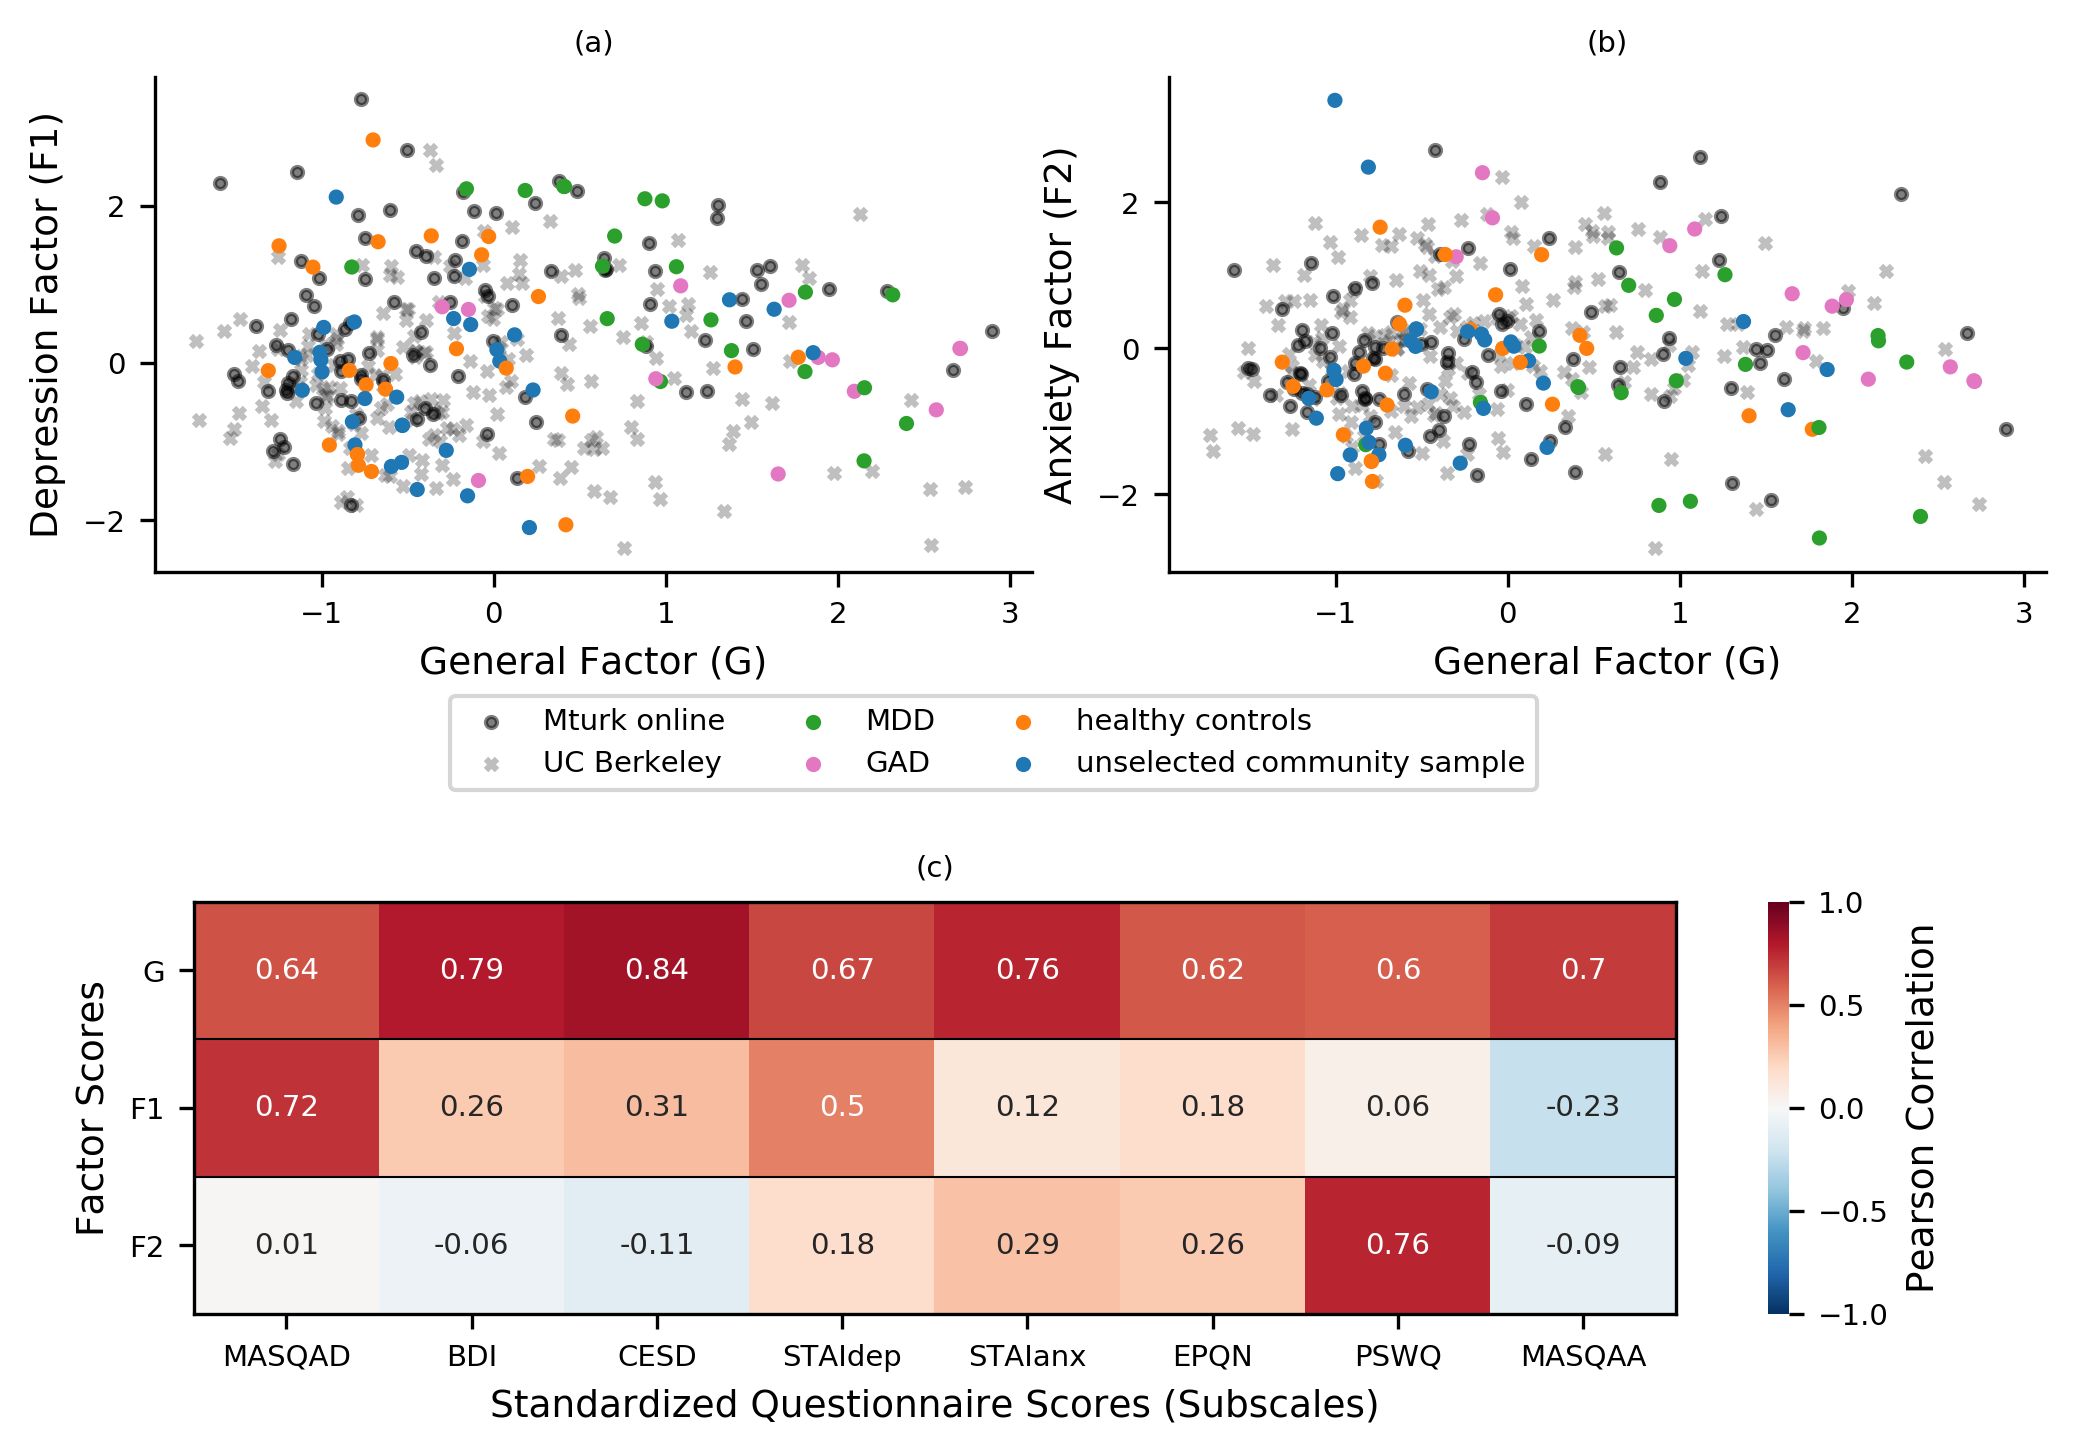

In [16]:
plt.figure(figsize=(6.5,5.5),dpi=300)
scatter_size=7
labelsize =9
ticklabelsize=7
legendsize=7

ax1 = plt.axes([0.03, 0.5, 0.45, 0.3]) #left bottom width height 
ax2 = plt.axes([0.55, 0.5, 0.45, 0.3])
ax3 = plt.axes([0.05, 0.05, 0.95, 0.25])
axes = [ax1,ax2,ax3]

# (a-b)
for i,(sp,loc) in enumerate(zip(['F1','F2'],[1,2])):
    plt.sca(axes[i])
    
    # Online
    idx = scores_df.index.isin(data_online['MID_all_unique'])
    x = scores_df.loc[idx,'G'].values
    y = scores_df.loc[idx,sp].values
    plt.scatter(x,y,c='k',alpha=0.5,marker='o',label='Mturk online',s=scatter_size)
    
    # Confirmatory Sample 
    idx = scores_df.index.isin(['X'+str(i) for i in Q_items_confirmatory_col_rev.columns])
    x = scores_df.loc[idx,'G'].values
    y = scores_df.loc[idx,sp].values
    plt.scatter(x,y,c='k',alpha=0.25,marker='x',label='UC Berkeley',s=scatter_size)  
    
    # Clinical 
    idx = scores_df.index.isin(data['MID_all_unique'])
    x = scores_df.loc[idx,'G'].values
    y = scores_df.loc[idx,sp].values
    color_cdm = convert_diagnosis_to_color(data['group_diag_all_unique'])
    plt.scatter(x,y,c=color_cdm,s=scatter_size)
    
    # Plot a single participant for legend 
    plt.scatter(x[0],y[0],c=color_cdm[0],label='MDD',s=scatter_size) # MDD
    plt.scatter(x[2],y[2],c=color_cdm[2],label='GAD',s=scatter_size) # GAD
    plt.scatter(x[1],y[1],c=color_cdm[1],label='healthy controls',s=scatter_size) 
    plt.scatter(x[50],y[50],c=color_cdm[50],label='unselected community sample',s=scatter_size) # GAD    

    if sp=='F1':
        plt.title('(a)',fontsize=ticklabelsize)
        plt.xlabel('General Factor (G)',fontsize=labelsize)
        plt.ylabel('Depression Factor (F1)',fontsize=labelsize)
    elif sp=='F2':
        plt.title('(b)',fontsize=ticklabelsize)
        plt.xlabel('General Factor (G)',fontsize=labelsize)
        plt.ylabel('Anxiety Factor (F2)',fontsize=labelsize)
        
    plt.xticks(fontsize=ticklabelsize)
    plt.yticks(fontsize=ticklabelsize)
    
plt.legend(loc='lower center',ncol=3,bbox_to_anchor=[-0.2,-0.47],fontsize=legendsize)
sns.despine()


# (c)
plt.sca(axes[-1])
plt.title('(c)',fontsize=ticklabelsize)
xset = [
                'MASQAD',
                'BDI',
                'CESD',
                'STAIdep',
                'STAIanx',
                'EPQN',
                'PSWQ',
                'MASQAA']
yset = ['G','F1','F2'] 


C = data_combined.loc[data_combined.dataset.isin(['clinical','confirmatory'])].corr()

maxx = 1
g = sns.heatmap(C.loc[C.index.isin(yset),xset].round(2),
            cmap='RdBu_r',vmin=-1*maxx,vmax=maxx,annot=True,label='correlation',
                annot_kws={"size": ticklabelsize},cbar_kws={'label':'Pearson Correlation'})

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = ticklabelsize,rotation=0);
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = ticklabelsize,rotation=0);
g.figure.axes[-1].yaxis.label.set_size(labelsize)
g.figure.axes[-1].tick_params(labelsize=ticklabelsize)
g.set_xlabel('Standardized Questionnaire Scores (Subscales)',fontsize=labelsize)
g.set_ylabel('Factor Scores',fontsize=labelsize)

for axis in ['top','bottom','left','right']:
    g.spines[axis].set_visible(True)
    g.spines[axis].set_color('black')
plt.axhline(y=1,linestyle='-',color='k',linewidth=0.5)
plt.axhline(y=2,linestyle='-',color='k',linewidth=0.5)

# save 
plt.savefig('../figures/figure_1.png',bbox_inches='tight')

# Figure 1 figure supplement 1

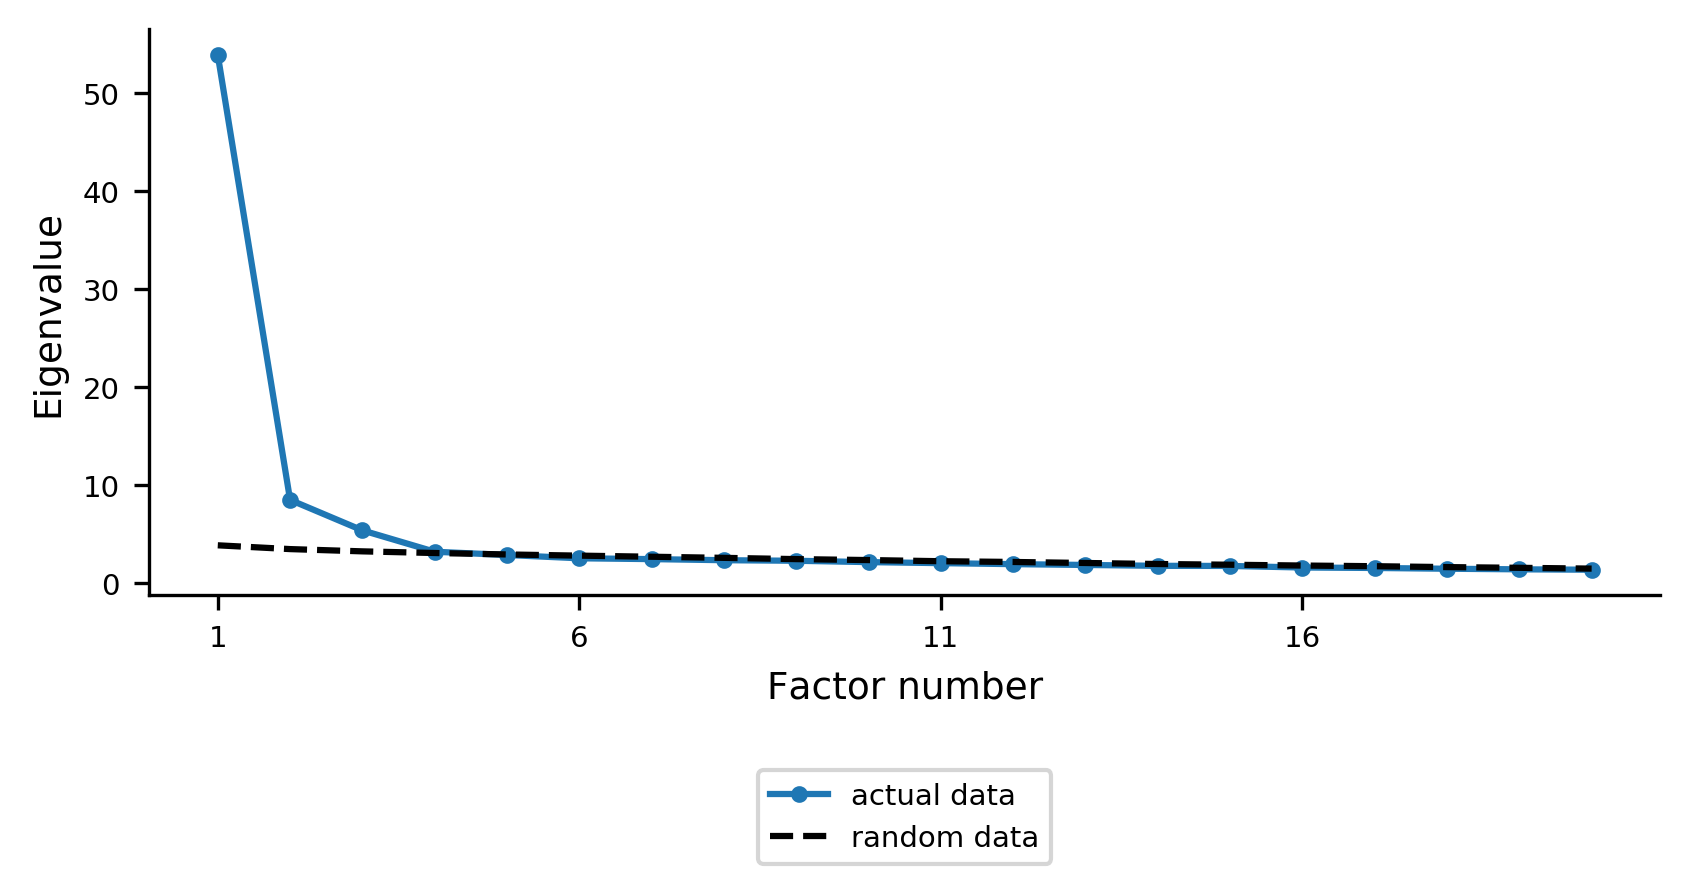

In [17]:
plt.figure(figsize=(6.5,2.5),dpi=300)

plt.plot(eigen.iloc[0:20].values,marker='.',label='actual data')
plt.plot(apsim.iloc[0:20,0].values,label='random data',c='k',linestyle='--')
plt.xticks(np.arange(0,20,5),np.arange(1,21,5),fontsize=ticklabelsize)
plt.yticks(fontsize=ticklabelsize)
plt.xlabel('Factor number',fontsize=labelsize)
plt.ylabel('Eigenvalue',fontsize=labelsize)
sns.despine()
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.5,-0.5],fontsize=legendsize)
plt.savefig('../figures/figure_1_figure_supplement1.png',bbox_inches='tight')

# Figure 1 figure supplement 2

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


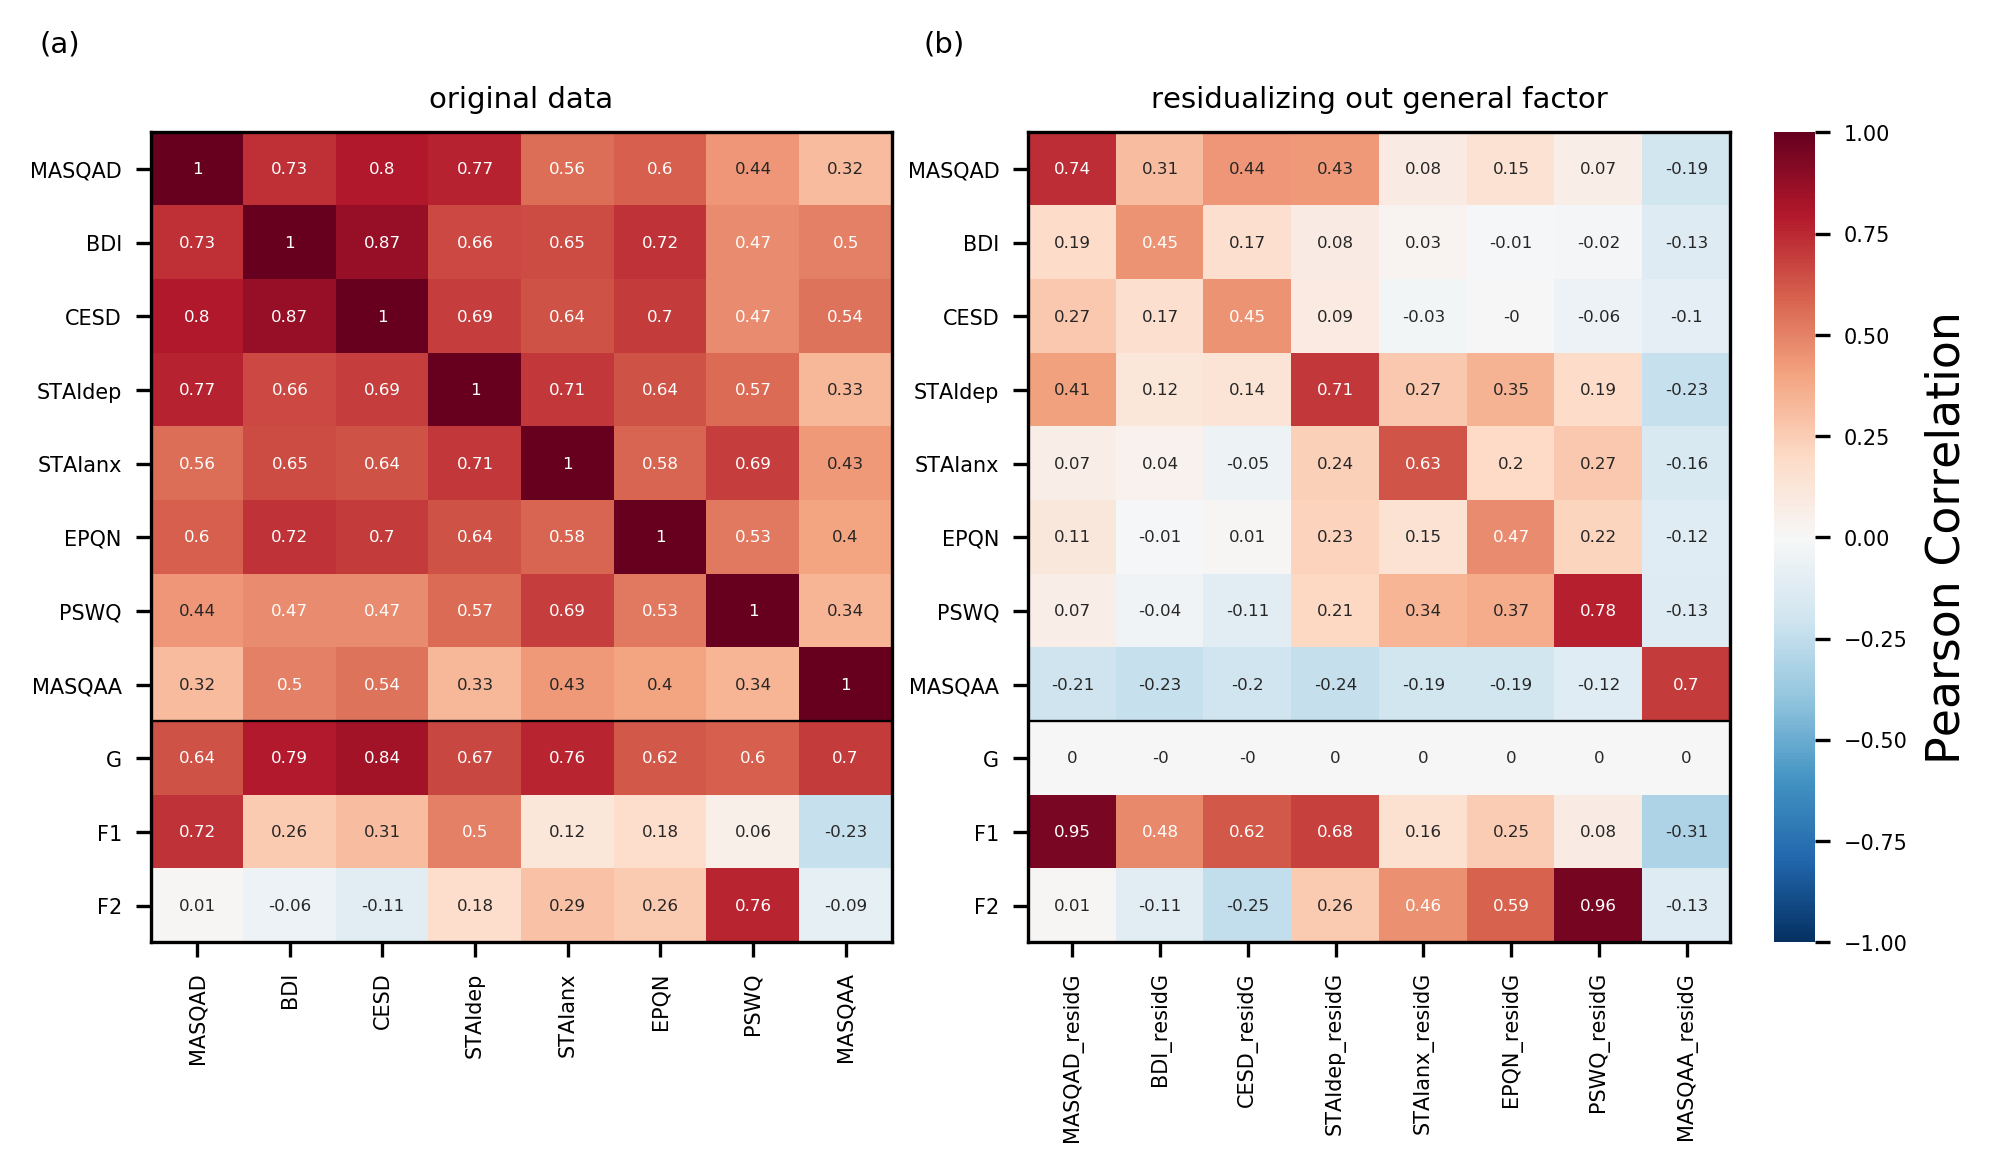

In [18]:
plt.figure(figsize=(6.5,3),dpi=300)
scatter_size=7
labelsize =9
ticklabelsize=7
legendsize=7

ax1 = plt.axes([0.05, 0.1, 0.38, 0.9]) #left bottom width height 
ax2 = plt.axes([0.5, 0.1, 0.45, 0.9])

axes = [ax1,ax2]

for i in range(len(axes)):
    loc = i+1

    plt.sca(axes[i])
    
    # Correlation plot
    if loc==1:
        title='original data'
        yset = [
        'MASQAD',
        'BDI',
        'CESD',
        'STAIdep',
        'STAIanx',
        'EPQN',
        'PSWQ',
        'MASQAA','G','F1','F2']
        xset = [
        'MASQAD',
        'BDI',
        'CESD',
        'STAIdep',
        'STAIanx',
        'EPQN',
        'PSWQ',
        'MASQAA']

    elif loc==2:
        title='residualizing out general factor'
        yset = [
        'MASQAD',
        'BDI',
        'CESD',
        'STAIdep',
        'STAIanx',
        'EPQN',
        'PSWQ',
        'MASQAA','G','F1','F2']
        xset = [
        'MASQAD_residG',
        'BDI_residG',
        'CESD_residG',
        'STAIdep_residG',
        'STAIanx_residG',
        'EPQN_residG',
        'PSWQ_residG',
        'MASQAA_residG']

    C = data_combined.loc[data_combined.dataset.isin(['clinical','confirmatory'])].corr()
    
    if i==1:
        cbarr=True
    else:
        cbarr=False
    
    g = sns.heatmap(C.loc[yset,xset].round(2),
    cmap='RdBu_r',vmin=-1,vmax=1,annot=True,label='correlation',
        cbar=cbarr,
        annot_kws={"size": ticklabelsize-3},
        cbar_kws={'label':'Pearson Correlation','location':'right'}, #'orientation':"horizontal",
        yticklabels=yset,xticklabels=xset)

    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = ticklabelsize-2,rotation=90);
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = ticklabelsize-2,rotation=0);
    g.figure.axes[-1].xaxis.label.set_size(labelsize-2)
    g.figure.axes[-1].tick_params(labelsize=ticklabelsize-2)

    for axis in ['top','bottom','left','right']:
        g.spines[axis].set_visible(True)
        g.spines[axis].set_color('black')
        plt.axhline(y=8,linestyle='-',color='k',linewidth=0.5)
    
    plt.title(title,fontsize=labelsize-2)

plt.text(-0.15,1.1,'(a)',fontsize=7,transform=ax1.transAxes)
plt.text(-.15,1.1,'(b)',fontsize=7,transform=ax2.transAxes)

plt.tight_layout()
plt.savefig('../figures/figure_1_figure_supplement2.png',bbox_inches='tight')
